In [35]:
#IMPORTING LIBRARIES

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
#lOAD THE DATASETS 
res = pd.read_csv('results.csv')
rac = pd.read_csv('races.csv')
driv = pd.read_csv('drivers.csv')
cons = pd.read_csv('constructors.csv')

In [37]:
#MERGING DATASETS
data = pd.merge(res, rac[['raceId','year','name','round']], how='left', on='raceId')
data = pd.merge(data, driv[['driverId','driverRef','nationality']], how='left', on='driverId')
data = pd.merge(data, cons[['constructorId','name','nationality']], how='left', on='constructorId')


In [38]:
#DROPPING COLUMNS
data.drop(['resultId','position','positionText','laps','fastestLap','statusId','raceId','number','constructorId'], axis=1, inplace=True)


In [39]:
#RENAME COLUMNS
data.rename(columns={'rank':'fastestLapRank','name_x':'gpName','nationality_x':'driverNationality','name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'}, inplace=True)


In [40]:
#REARRANGING COLUMNS
data = data[['year','gpName','round','driver','constructorName','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driverNationality','constructorNationality']]

In [41]:
#DROPPING '2019' SEASON
data = data[data['year']!='2019']

In [42]:
#SORTING VALUES
data = data.sort_values(by=['year','round','positionOrder'], ascending =[False, True, True])

In [43]:
#Replacing the empty values 
data['time'].replace('\\N',np.NaN,inplace= True)
data['milliseconds'].replace('\\N',np.NaN,inplace=True)
data['fastestLapTime'].replace('\\N',np.NaN,inplace=True)
data['fastestLapSpeed'].replace('\\N',np.NaN,inplace=True)
data['fastestLapRank'].replace('\\N',np.NaN,inplace=True)

In [44]:
#Changing datatypes to float
data['fastestLapSpeed'] = data['fastestLapSpeed'].astype(float)
data['fastestLapRank'] =  data['fastestLapRank'].astype(float)
#data['milliseconds'] = data['milliseconds'].astype(float)

In [45]:
#Reseting Index
data.reset_index(drop = True, inplace = True)

In [46]:
#DATA INFO()
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25460 non-null  int64  
 1   gpName                  25460 non-null  object 
 2   round                   25460 non-null  int64  
 3   driver                  25460 non-null  object 
 4   constructorName         25460 non-null  object 
 5   grid                    25460 non-null  int64  
 6   positionOrder           25460 non-null  int64  
 7   points                  25460 non-null  float64
 8   time                    6850 non-null   object 
 9   milliseconds            6849 non-null   object 
 10  fastestLapRank          7211 non-null   float64
 11  fastestLapTime          7010 non-null   object 
 12  fastestLapSpeed         7010 non-null   float64
 13  driverNationality       25460 non-null  object 
 14  constructorNationality  25460 non-null

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259,5.0,1:36.228,202.469,British,German


In [47]:
# """ sns.set_palette('Set2')
# plt.rcParams['figure.figsize']=10,16 """

<AxesSubplot:xlabel='positionOrder', ylabel='driver'>

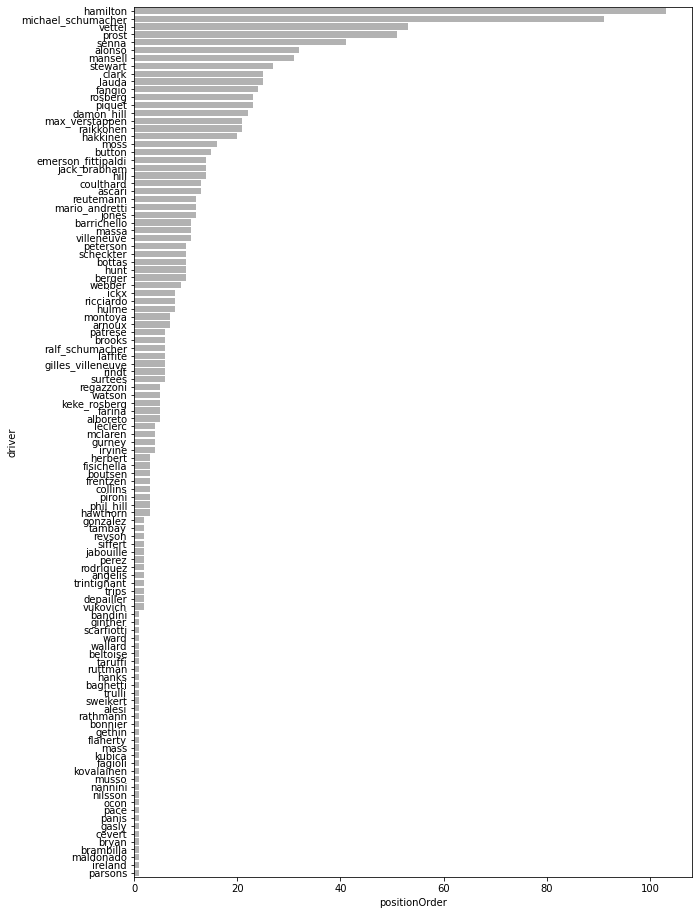

In [48]:
#GrandPre Winners
driver_win = data.loc[data['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(10,16))
sns.barplot(data=driver_win, y='driver',x='positionOrder',color='black',alpha=0.3)

<AxesSubplot:xlabel='positionOrder', ylabel='driver'>

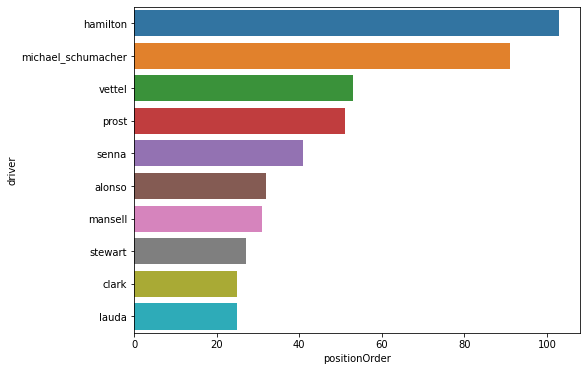

In [49]:
#Top 10 driver off all time
top10drivers = driver_win.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=top10drivers,y='driver',x='positionOrder')

<AxesSubplot:xlabel='positionOrder', ylabel='constructorName'>

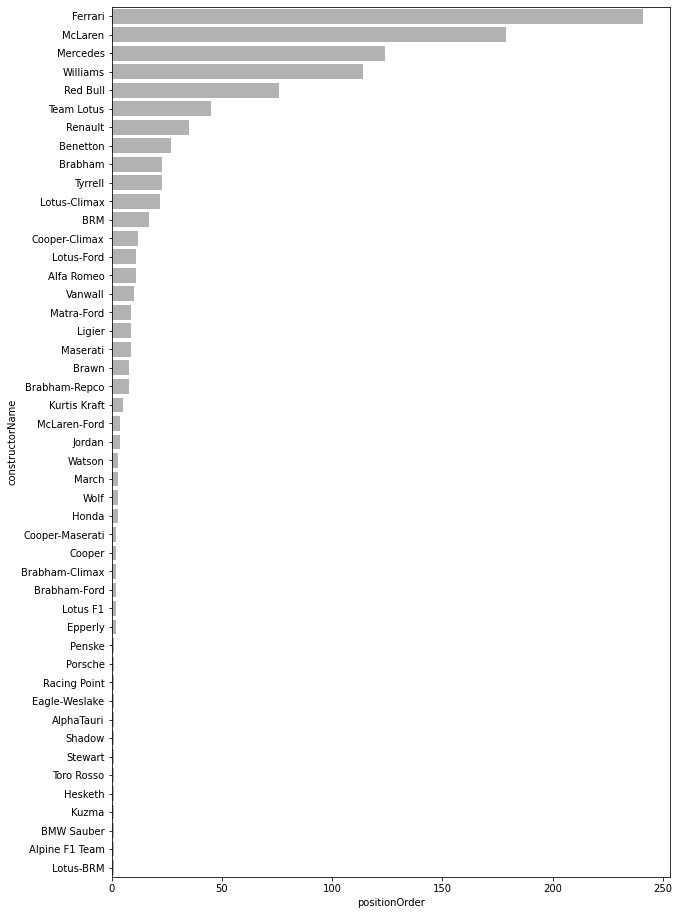

In [50]:
#GrandPre Constructor Winners
const_win = data.loc[data['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(10,16))
sns.barplot(data=const_win, y='constructorName',x='positionOrder',color='black',alpha=0.3)